<a href="https://colab.research.google.com/github/ChatMadhu/Customer-Segmentation/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This is already installed. Only to make sure
!pip install kaggle

In [2]:
# COnfiguring the path of API

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import Face Mask Detection

In [3]:
#Download the dataset using API
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Extracting the compressed Dataset

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The Dataset is extracted')

The Dataset is extracted


In [5]:
# List your directories
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependancies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

1) Let's analyze with mask

In [7]:
# create a directorty for all the with mask files

with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2825.jpg', 'with_mask_3562.jpg', 'with_mask_2382.jpg', 'with_mask_1181.jpg', 'with_mask_1607.jpg']
['with_mask_2805.jpg', 'with_mask_1411.jpg', 'with_mask_1056.jpg', 'with_mask_1705.jpg', 'with_mask_113.jpg']


2) Let's analyze without mask

In [8]:
# create a directorty for all the with mask files

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3286.jpg', 'without_mask_1761.jpg', 'without_mask_3801.jpg', 'without_mask_2125.jpg', 'without_mask_1573.jpg']
['without_mask_2516.jpg', 'without_mask_3217.jpg', 'without_mask_3756.jpg', 'without_mask_641.jpg', 'without_mask_522.jpg']


In [9]:
print('Number of with mask mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask mask images: 3725
Number of without mask images: 3828


Creating Labels for the two classes of images

with mask --> labesl is 1

without mask --> label is 0

In [10]:
#create the labels
## this creates a list of 1's and 0's for each lengths

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print('with_mask_labels:', with_mask_labels[0:5])
print('without_mask_labels:', without_mask_labels[0:5])

with_mask_labels: [1, 1, 1, 1, 1]
without_mask_labels: [0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
#combine 2 sets

labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


** Displaying the Images **

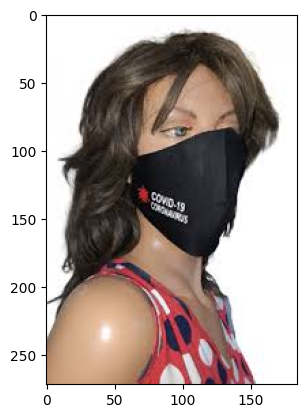

In [14]:
# Display a withmask image

img = mpimg.imread('/content/data/with_mask/with_mask_2382.jpg')
imgplot = plt.imshow(img)
plt.show()

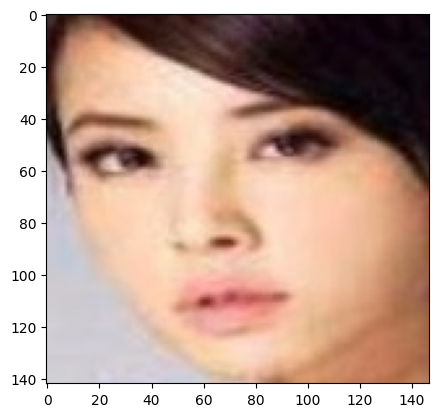

In [15]:
# Display a withoutmask image

img = mpimg.imread('/content/data/without_mask/without_mask_3286.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1) Resize the images

2) Convert the images


In [16]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data= []

for img_file in with_mask_files:

  #read each image in with_mask_path by concatenating with image path ad name
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')  #in case some of the images are in gray scale this will convert it into RGB
  image = np.array(image)   #convert image into numpy array
  data.append(image)      #numpy array is now in 'data' list


# convert images to numpy arrays

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  #read each image in without_mask_path by concatenating with image path ad name
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')  #in case some of the images are in gray scale this will convert it into RGB
  image = np.array(image)   #convert image into numpy array
  data.append(image)      #numpy array is now in 'data' list


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[255, 254, 255],
        [255, 254, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 253],
        [254, 254, 253]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [254, 254, 253],
        [253, 253, 251],
        [252, 252, 252]],

       [[255, 255, 255],
        [253, 253, 253],
        [255, 254, 255],
        ...,
        [255, 255, 254],
        [251, 251, 249],
        [251, 251, 250]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# Here the data and label both type is list. but we need them as numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)
#output is like (no of numpy arrays) ,  (height), (width) ,(color_channels)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


split your data into training and testing data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape,X_test.shape)

print(Y.shape , Y_train.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


scaling the data

In [29]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
X_train_scaled[0]

array([[[0.60784314, 0.57647059, 0.53333333],
        [0.60784314, 0.57647059, 0.53333333],
        [0.61176471, 0.58039216, 0.5372549 ],
        ...,
        [0.61960784, 0.58823529, 0.54509804],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ]],

       [[0.61176471, 0.58039216, 0.5372549 ],
        [0.61176471, 0.58039216, 0.5372549 ],
        [0.61176471, 0.58039216, 0.5372549 ],
        ...,
        [0.61960784, 0.58823529, 0.54509804],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ]],

       [[0.61568627, 0.58431373, 0.54117647],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ],
        ...,
        [0.61960784, 0.58823529, 0.54509804],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ]],

       ...,

       [[0.52156863, 0.48235294, 0.44705882],
        [0.52156863, 0.48235294, 0.44705882],
        [0.52156863, 0

Building the CNN

In [31]:
import tensorflow as tf     #from google
from tensorflow import keras    #keras should raperount with tensorflow or pytorch(from Facebook)


In [32]:
#setting the NN architecture

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3) , activation = 'relu',input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3) , activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))



In [33]:
#compile the NN
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [34]:
#training the NN

history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4814 - acc: 0.7743 - val_loss: 0.2801 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.3101 - acc: 0.8768 - val_loss: 0.2346 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2484 - acc: 0.9049 - val_loss: 0.2335 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1939 - acc: 0.9246 - val_loss: 0.2058 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1659 - acc: 0.9356 - val_loss: 0.2081 - val_acc: 0.9240
